In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport


/home/eugen/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/eugen/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("PET_Diszitis Final - 2025-11-23.tsv", sep="\t")

# Remove rows with age not convertible to int
df = df[pd.to_numeric(df['age'], errors='coerce').notnull()]

# Remove rows with numbers in "name"
df = df[~df['name'].str.contains(r"[0-9]", na=False)]

# Remove rows with nan in "name"
df = df[df['name'].notna()]

df

,Unnamed: 0,name,DOB,age,unspez gewertet,unspez Fokus abgeklärt 0nein 1ja+neg 2ja+pos,weitere,Thrombus,"sex (1F, 2M)",Diagnose,...,"1 = Fokussuche, 2 = Ausschluss/Nachweis Diszitis weil MRT unklar, 3 = MRT nicht möglich / Ersatz für MRT, 4 = VK, 5 = Materialschaden, Frage nach Infekt, 6 = Infekt im Labor ohne Fokus","Author: (1= DM, 2=iv Drogen, 3=PAVK, 4=Cortisontherapie, 5=Zahnbehandlung, 6=Immunschwäche, 7=zn CTX, 8=Malignom, 9=Infiltrationen, 10=C2) Risikofaktoren",RevisionsOP 2 =kein Infekt,ASA,ausgeheilt 2=NA 3=dead,"Neurologie 1 = Paresen, 2 = vorbestehend, 3 = Tetraparese","Besserung 1 = komplett 2 =ja, aber nicht auf normal 3 tot 4 neues Defizit","(1= DM, 2=iv Drogen, 3=PAVK, 4=Cortisontherapie, 5=Zahnbehandlung, 6=Immunschwäche, 7=zn CTX, 8=Malignom, 9=Infiltrationen, 10=C2, 11=Parkinson, 12 = Niereninsuffizienz)",Unnamed: 46,Unnamed: 47
0,2260695.0,"Frisch, Franz",06.03.1954,66.0,-,-,-,NaN,2.0,Spondylodiszitis HW3/4,...,1,0,0,2.0,1,0.0,x,NaN,NaN,NaN
1,2971475.0,"Ederer, Tilo",11.10.1958,64.0,-,-,-,NaN,2.0,Spondylodiszitis HW5/6/7,...,1,0,0,3.0,1,NaN,NaN,NaN,NaN,NaN
2,1278558.0,"Buchberger, Peter",25.03.1960,61.0,-,-,-,NaN,2.0,Epiduralabszess C1-Th2,...,1,"1,3",0,3.0,2,NaN,NaN,NaN,NaN,NaN
3,2812416.0,"Jungbauer, Petra",26.06.1963,57.0,-,-,-,NaN,1.0,Intraspinales Empyem HW2 - BW1,...,1,Leberzirrhose,0,3.0,1,1.0,2,NaN,NaN,NaN
4,2057543.0,"Remus, Nadja",13.05.1958,65.0,Schulter,1,-,NaN,1.0,"Spondylodiszitis BW11/12, L1/2, L4/5, L5/S1",...,1,"1, 3, 2004",0,1.0,1,NaN,NaN,NaN,1x HerzSPECT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2762319.0,"Wutzer, Karl",01.03.1958,62.0,-,-,-,1.0,2.0,Spondylodiszitis L4/5/S1+ Empyem,...,1,0,0,2.0,0,2.0,x,NaN,NaN,NaN
206,2542531.0,"Lechner, Peter",31.12.1953,67.0,-,-,-,NaN,2.0,Diszitis L4/5+L5/S1 mit spinalem Empyem,...,1,3,0,3.0,1,0.0,x,NaN,NaN,NaN
207,1516980.0,"Niederle, Helmut",28.01.1939,82.0,Magen,0,Va ColonCA,NaN,2.0,"prävertebraler Abszess, Spondylodiszitis L1/2,...",...,1,0,0,3.0,2,NaN,NaN,NaN,NaN,"PET hat zweite Höhe erkannt, MRT holo ergänzt"
208,1567104.0,"Tränkl, Rudolf",19.07.1952,69.0,-,-,-,NaN,2.0,Spondylodiszitis LW4/5,...,3,11,0,3.0,1,NaN,NaN,NaN,NaN,NaN


In [3]:
categorical = [
    'name',
    'sex (1F, 2M)',
    'Fokus abgeklärt',
    'unspez gewertet',
    'unspez Fokus abgeklärt 0nein 1ja+neg 2ja+pos',
    'weitere',
    'Diagnose',
    'HWS',
    'BWS',
    'LWS',
    'intraspinal',
    'biopsy',
    'OP',
    '1 = lowgrade 2 = highgrade',
    'histo surgery 3 intermediär 0 neg',
    'mibi other',
    'discitis in MRT = TE, 2 Frage diszitis b MRT unklar, 0 = n übereinstimmend, 3 kein MRT, 4 Ausschluss Diszitis, 5 Diszitis im MRT n erkannt, 6 neuer Nachweis Diszitis',
    'other spinal TE',
    'spinal: overall, 0 = nicht übereinstimmend, 1= übereinstimmend, 2 = MRT unklar, 3 kein MRT',
    'initialer Fokus',
    'neuer Fokus nach PET',
    'TE at sus focus 2 = vorOP spinal, 0 Fokus nicht dargestellt, 3 kein Fokus, 4 Fokus weg/saniert, 5 Fokus nicht gefunden',
    'reason for PET',
    '1 = Fokussuche, 2 = Ausschluss/Nachweis Diszitis weil MRT unklar, 3 = MRT nicht möglich / Ersatz für MRT, 4 = VK, 5 = Materialschaden, Frage nach Infekt, 6 = Infekt im Labor ohne Fokus',
    'Risikofaktoren',
    'Neurologie 1 = Paresen, 2 = vorbestehend, 3 = Tetraparese',
]

continuous = [
    'age',
    # 'CRP initial',
]

columns = categorical[:] + continuous[:]

In [4]:
# profile = ProfileReport(df, title="Data Report", explorative=True)

# # Export to PDF
# # profile.to_file("report.pdf")
# profile.to_file("report.html")

# Analyse

N = 191 patients


Text(0.5, 1.0, 'Counts of Spinal Regions Affected')

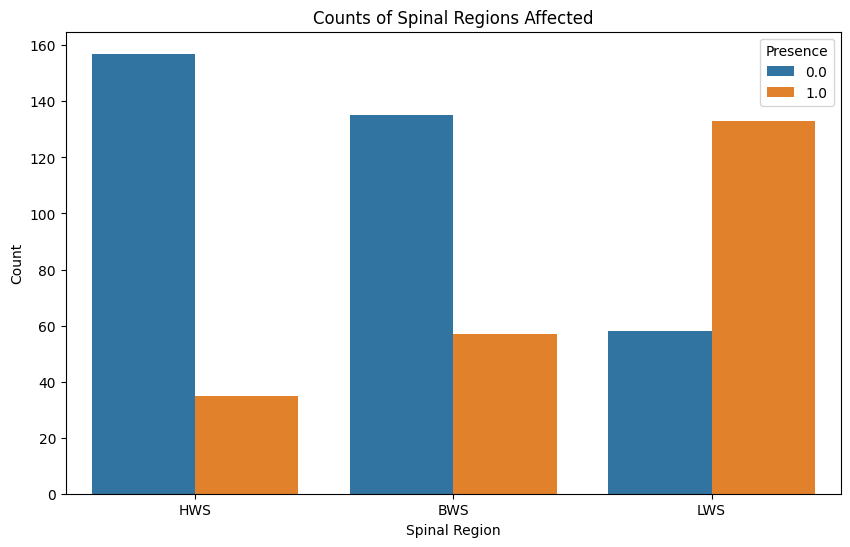

In [5]:
print(f"N = {df['name'].nunique()} patients")

# Barplot with counts of presence for HWS, BWS, LWS
plt.figure(figsize=(10, 6))
sns.countplot(data=df.melt(value_vars=['HWS', 'BWS', 'LWS'], var_name='Spinal Region', value_name='Presence'), x='Spinal Region', hue='Presence')
plt.xlabel('Spinal Region')
plt.ylabel('Count')
plt.title('Counts of Spinal Regions Affected')

In [6]:
# Convert surgery date to pd.datetime
# Take into account that some rows are empty, leave them as NaT
# Then there are some rows with multiple dates, take the first one
# Format of date is dd.mm.yyyy
df['surgery date'] = pd.to_datetime(df['surgery date'].str.split().str[0], format='%d.%m.%Y', errors='coerce')  # this is correct, rest are '-' or NaN -> converted to NaT

# Convert date of PET to pd.datetime
df['date of PET'] = pd.to_datetime(df['date of PET'].str.split().str[0], format='%d.%m.%Y', errors='coerce')

# Create new column 'pet_before_surgery' which is True if date of PET is before surgery date
df['pet_before_surgery'] = (df['date of PET'] < df['surgery date'])
df['pet_before_surgery'].value_counts()

pet_before_surgery
False    151
True      41
Name: count, dtype: int64

Mibi

In [7]:
df['mibi_surgery'] = df['mibi surgery 0 = neg'].copy()


rename_bacteria = {
    "Propionibacterium acnes": "Cutibacterium acnes",
    "Cutibacterium (Propionibacterium) acnes": "Cutibacterium acnes",
    "E. faecalis": "Enterococcus faecalis",
    "S. capitis": "Staphylococcus capitis",
    "Pseudomonas": "Pseudomonas aeruginosa",
    "STAU": "Staphylococcus aureus",
}

# Collect all the possible values in mibi_surgery (they are comma separated)
mibi_surgery_values = list()

for entry in df['mibi_surgery'].dropna().unique():
    for value in str(entry).split(','):
        if value.strip() in rename_bacteria:
            mibi_surgery_values.append(rename_bacteria[value.strip()])
        else:
            mibi_surgery_values.append(value.strip())

mibi_surgery_values = list(set(mibi_surgery_values))

# Print in new row the unique values
for value in sorted(mibi_surgery_values):
    print(value)

-
0
Acinetobacter baumanni
Author: Behandlung candida
Brevibacterium ravenspurgense
Corynebacterium afermentan (in Anreicherung)
Corynebacterium tuberculostearicum
Cutibacterium (Propionibacterium) avidum
Cutibacterium acnes
E. coli
E.faecium
Eikenella corrodens
Enterobacter cloacae
Enterobacter cloacae complex
Enterococcus faecalis
Finegoldia magna
Klebsiella pneumoniae
MRSA
Mycobacterium intracellulare
Parvimonas micra
Pseudomonas aeruginosa
S. saprophyticus
Serratia marcescens
Serratia nematodiphilia
Staphylococcus agalacticae
Staphylococcus aureus
Staphylococcus borealis
Staphylococcus capitis
Staphylococcus epidermidis
Staphylococcus hominis
Staphylococcus saccharolyticus
Staphylococcus warneri
Streptococcus agalactiae
Streptococcus anginosus
Streptococcus dysgalactiae
Streptococcus intermedius
Streptococcus mitis
Streptokokken Gruppe B (S.agalactiae) BK
Streptokokken Gruppe G
allerdings unsicher
ggf. LGI 0
not done


In [8]:
# Count in each row how frequent each bacteria appeared and display counts

bacteria_counts = dict()
for bacteria in mibi_surgery_values:
    count = 0
    for i, row in df.iterrows():
        if pd.isna(row['mibi_surgery']):
            continue
        bacteria_list = [b.strip() for b in str(row['mibi_surgery']).split(',')]
        bacteria_list_renamed = [rename_bacteria.get(b, b) for b in bacteria_list]
        if bacteria in bacteria_list_renamed:
            count += 1
    bacteria_counts[bacteria] = count

pd.Series(bacteria_counts).sort_values(ascending=False)

0                                               48
Staphylococcus aureus                           44
Cutibacterium acnes                             25
Staphylococcus epidermidis                      22
not done                                        18
E. coli                                         11
Enterococcus faecalis                            5
Pseudomonas aeruginosa                           4
Staphylococcus saccharolyticus                   3
Staphylococcus hominis                           3
Staphylococcus warneri                           3
Staphylococcus agalacticae                       3
MRSA                                             2
Streptococcus dysgalactiae                       2
Staphylococcus capitis                           2
Parvimonas micra                                 2
Streptococcus intermedius                        2
allerdings unsicher                              1
Finegoldia magna                                 1
Enterobacter cloacae           

In [9]:
# Define new reasonable columns based on common bacteria found
df['mibi_surgery_neg'] = df['mibi_surgery'] == "0"
df['mibi_surgery_notdone'] = df['mibi_surgery'] == "not done"
df['mibi_surgery_STAU'] = df['mibi_surgery'].str.contains("Staphylococcus aureus", na=False)
df['mibi_surgery_CUTI'] = df['mibi_surgery'].str.contains("Cutibacterium acnes", na=False)
df['mibi_surgery_STEP'] = df['mibi_surgery'].str.contains("Staphylococcus epidermidis", na=False)
df['mibi_surgery_ECOL'] = df['mibi_surgery'].str.contains("E. coli", na=False)
df['mibi_surgery_EFEC'] = df['mibi_surgery'].str.contains('Enterococcus faecalis', na=False)
df['mibi_surgery_else'] = ~(df['mibi_surgery_neg'] | df['mibi_surgery_notdone'] | df['mibi_surgery_STAU'] | df['mibi_surgery_CUTI'] | df['mibi_surgery_STEP'] | df['mibi_surgery_ECOL'] | df['mibi_surgery_EFEC'])

In [10]:
# Show counts of each of above by location (HWS, BWS, LWS)
location_counts = df.groupby(['HWS', 'BWS', 'LWS']).agg({
    'mibi_surgery_neg': 'sum',
    'mibi_surgery_notdone': 'sum',
    'mibi_surgery_STAU': 'sum',
    'mibi_surgery_CUTI': 'sum',
    'mibi_surgery_STEP': 'sum',
    'mibi_surgery_ECOL': 'sum',
    'mibi_surgery_EFEC': 'sum',
    'mibi_surgery_else': 'sum'
}).reset_index()

location_counts

,HWS,BWS,LWS,mibi_surgery_neg,mibi_surgery_notdone,mibi_surgery_STAU,mibi_surgery_CUTI,mibi_surgery_STEP,mibi_surgery_ECOL,mibi_surgery_EFEC,mibi_surgery_else
0,0.0,0.0,0.0,0,3,0,0,0,0,0,1
1,0.0,0.0,1.0,37,7,2,12,11,5,3,29
2,0.0,1.0,0.0,3,3,0,5,5,1,0,12
3,0.0,1.0,1.0,2,3,1,5,2,2,1,7
4,1.0,0.0,0.0,3,2,0,1,2,1,0,11
5,1.0,0.0,1.0,1,0,0,1,1,1,1,4
6,1.0,1.0,0.0,1,0,0,1,0,0,0,4
7,1.0,1.0,1.0,0,0,0,0,1,1,0,0


Patho

In [11]:
# Process patho results
df['patho'] = df['histo surgery 3 intermediär 0 neg'].copy()
df['patho'].value_counts()

patho
1           136
not done     28
0            19
2             5
3             3
Name: count, dtype: int64

CRP

In [12]:
# Convert to numerical from "19,7" being comma as decimal separator
df['CRP initial'] = pd.to_numeric(df['CRP initial'].str.replace(',', '.'), errors='coerce')
df['CRP'] = df['CRP initial'].copy()
df['CRP initial'].describe()

count    192.000000
mean       9.755208
std        9.165384
min        0.100000
25%        2.700000
50%        7.200000
75%       14.675000
max       46.200000
Name: CRP initial, dtype: float64

Summary variables

In [13]:
df['pet_new_spinal_foc'] = df['other spinal TE'].copy()
df['pet_new_spinal_foc'].value_counts()

pet_new_spinal_foc
0.0    185
1.0      7
Name: count, dtype: int64

Fokus > Primary/secondary infection

In [14]:
# As for microbiology check all possible initial foci
df["spondylodiscitis_type"].value_counts()  # 

spondylodiscitis_type
primary               60
secondary: surgery    53
secondary             52
recidive              24
Name: count, dtype: int64

In [15]:
df["pet_new_nonspinal_foc"].value_counts()

pet_new_nonspinal_foc
0.0    157
1.0     35
Name: count, dtype: int64

# Analyse

In [20]:
col_sel = [
    'age',
    'HWS',
    'BWS',
    'LWS',
    'pet_before_surgery',
    'spondylodiscitis_type',
    "mibi_surgery_neg",
    "mibi_surgery_notdone",
    "mibi_surgery_STAU",
    "mibi_surgery_CUTI",
    "mibi_surgery_STEP",
    "mibi_surgery_ECOL",
    "mibi_surgery_EFEC",
    "mibi_surgery_else",
    'patho',
    'CRP initial',
    "pet_new_spinal_foc",
    "pet_new_nonspinal_foc",
]

df_sel = df[col_sel].copy()

spondy_types = df["spondylodiscitis_type"].dropna().unique()
patho_types = df["patho"].dropna().unique()
for s_type in spondy_types:
    df_sel[f'spondy_{s_type}'] = df_sel['spondylodiscitis_type'] == s_type
df_sel.drop(columns=['spondylodiscitis_type'], inplace=True)
for p_type in patho_types:
    df_sel[f'patho_{p_type}'] = df_sel['patho'] == p_type
df_sel.drop(columns=['patho'], inplace=True)

df_sel

,age,HWS,BWS,LWS,pet_before_surgery,mibi_surgery_neg,mibi_surgery_notdone,mibi_surgery_STAU,mibi_surgery_CUTI,mibi_surgery_STEP,...,pet_new_nonspinal_foc,spondy_secondary,spondy_primary,spondy_secondary: surgery,spondy_recidive,patho_1,patho_3,patho_0,patho_not done,patho_2
0,66.0,1.0,0.0,0.0,False,False,False,False,False,False,...,1.0,True,False,False,False,True,False,False,False,False
1,64.0,1.0,0.0,0.0,False,False,False,False,False,False,...,1.0,False,True,False,False,True,False,False,False,False
2,61.0,1.0,1.0,0.0,False,False,False,False,False,False,...,1.0,True,False,False,False,True,False,False,False,False
3,57.0,1.0,1.0,0.0,False,False,False,False,False,False,...,1.0,False,True,False,False,True,False,False,False,False
4,65.0,0.0,1.0,1.0,False,False,False,True,True,False,...,0.0,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,62.0,1.0,0.0,1.0,False,True,False,False,False,False,...,1.0,False,True,False,False,True,False,False,False,False
206,67.0,0.0,0.0,1.0,False,True,False,False,False,False,...,1.0,False,True,False,False,True,False,False,False,False
207,82.0,1.0,0.0,1.0,False,False,False,False,True,True,...,1.0,False,False,True,False,True,False,False,False,False
208,69.0,0.0,0.0,1.0,True,True,False,False,False,False,...,0.0,False,True,False,False,True,False,False,False,False


In [21]:
# Profiling report of this new dataframe
profile_sel = ProfileReport(df_sel, title="Selected Data Report", explorative=True)
profile_sel.to_file("report_processed_selected.html")

/home/eugen/.local/lib/python3.10/site-packages/ydata_profiling/profile_report.py:365: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 25/25 [00:00<00:00, 186579.36it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]